<a href="https://colab.research.google.com/github/DougChul/Ferroelectric-ThinFilm-Poling/blob/main/L_D_mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


이론값
0.10132118364233778
0.10132118364233779
(49, 49)
intgral
12.25317576810414


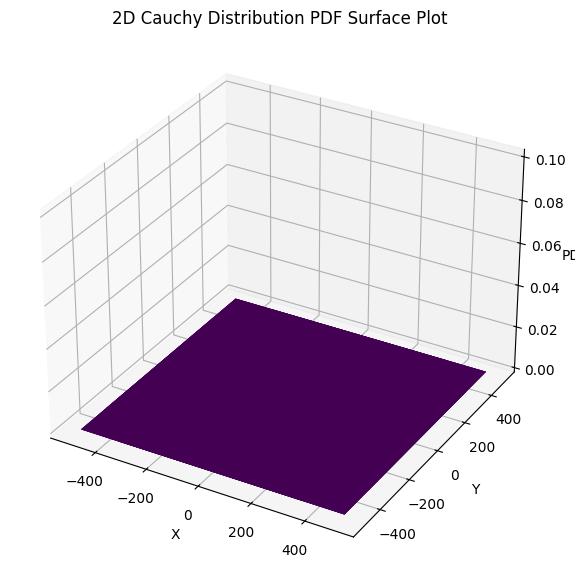

In [ ]:
# @title
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import cauchy  # 코시 분포
from scipy.integrate import simpson # 적분

n_sample=100

scale_x = 1
scale_y = 1

E_x_range=scale_x*637
E_y_range=scale_y*637

side_num=n_sample*0.02  # left right sample 개수
mid_num=(n_sample-2*side_num) # 중간 sample 개수 고밀도.
cx=E_x_range*9/10/(side_num-1) # 그냥 넣으면 배열이 겹침. 보정값.
cy=E_y_range*9/10/(side_num-1)

# 낮은 확률 부분은 CDF<0.01 부분은 2% sample CDF>0.01 부분은 98% sample 배정
x_median=np.linspace(-E_x_range/10+cx,E_x_range/10-cx,int(mid_num))
x_left=np.linspace(-E_x_range,-E_x_range/10, int(side_num))
x_right=np.linspace(E_x_range/10, E_x_range, int(side_num))

x=np.concatenate([x_left,x_median,x_right]) # 합친 x의 sample 간격

#print(x)
y_median=np.linspace(-E_y_range/10+cy,E_y_range/10-cy,int(mid_num))
y_left=np.linspace(-E_y_range, -E_y_range/10, int(side_num))
y_right=np.linspace(E_y_range/10, E_y_range, int(side_num))

y=np.concatenate([y_left, y_median, y_right]) # 합친 x의 sample 간격

x_avg=np.zeros(n_sample-1)
y_avg=np.zeros(n_sample-1)

for i in range(0,n_sample-1):
  x_avg[i]=(x[i]+x[i+1])/2
  y_avg[i]=(y[i]+y[i+1])/2


print()
X, Y = np.meshgrid(x_avg, y_avg)

pdf_array = cauchy.pdf(X, loc=0, scale=scale_x) * cauchy.pdf(Y, loc=0, scale=scale_y)

peak=1/(scale_x*np.pi*scale_y*np.pi) # 이론 상 꼭짓점 값
print('이론값')
print(peak)
print(np.max(pdf_array));
print(np.unravel_index(np.argmax(pdf_array), pdf_array.shape))

# 행 기준(가로 방향) 적분
#row_integral = simpson(y=pdf_array, x=x, axis=1)
#print(row_integral)
# 열 기준(세로 방향) 적분
#col_integral = simpson(y=row_integral, x=y)
#print(col_integral)

# Parameter of N

dx = np.diff(x)  # x 방향의 간격 (비균일 가능성 고려) 개수 하나 줄어들음.
dy = np.diff(y)  # y 방향의 간격

mesh_area = dx[:, None] * dy[None, :] # 각 mesh 면적
#print(mesh_area)
intgral=0
sum_area=0

print('intgral')
for a in range(0,n_sample-1):
 for b in range(0,n_sample-1):
  intgral=intgral+pdf_array[a,b]
  sum_area=sum_area+pdf_array[a,b]*mesh_area[a,b]
  #print(pdf_array[a,b]*mesh_area[a,b])
  #print(mesh_area[a,b])

#print(intgral)
print(sum_area)
# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_array, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
plt.title("2D Cauchy Distribution PDF Surface Plot")
plt.show()

[-137.          468.15        469.50531915  470.8606383   472.21595745
  473.5712766   474.92659574  476.28191489  477.63723404  478.99255319
  480.34787234  481.70319149  483.05851064  484.41382979  485.76914894
  487.12446809  488.47978723  489.83510638  491.19042553  492.54574468
  493.90106383  495.25638298  496.61170213  497.96702128  499.32234043
  500.67765957  502.03297872  503.38829787  504.74361702  506.09893617
  507.45425532  508.80957447  510.16489362  511.52021277  512.87553191
  514.23085106  515.58617021  516.94148936  518.29680851  519.65212766
  521.00744681  522.36276596  523.71808511  525.07340426  526.4287234
  527.78404255  529.1393617   530.49468085  531.85       1137.        ]

이론값
0.10132118364233778
1.3479988367429802e-10
(0, 0)
intgral
5.45247008292999e-05


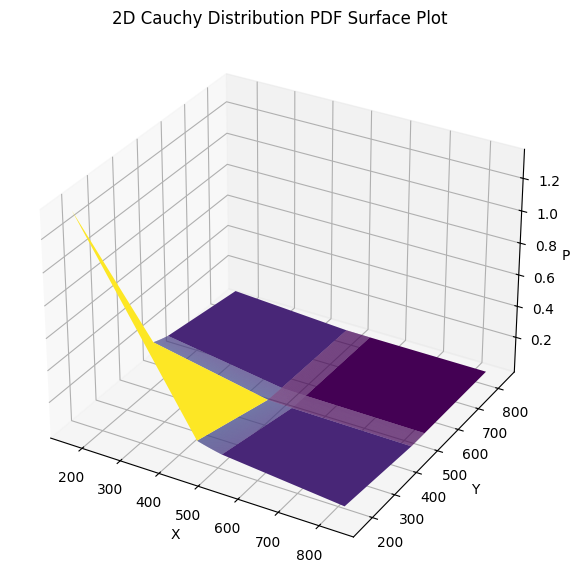

In [ ]:
# @title
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import cauchy  # 코시 분포
from scipy.integrate import simpson # 적분

n_sample=50

scale_x = 1
scale_y = 1

E_x_range=scale_x*637
E_y_range=scale_y*637

side_num=n_sample*0.04  # left right sample 개수
mid_num=(n_sample-2*side_num) # 중간 sample 개수 고밀도.
den=20

# 낮은 확률 부분은 CDF<0.01 부분은 2% sample CDF>0.01 부분은 98% sample 배정
x_median=np.linspace(-E_x_range/den,E_x_range/den,int(mid_num)+2)[1:-1]
x_left=np.linspace(-E_x_range,-E_x_range/den, int(side_num))
x_right=np.linspace(E_x_range/den, E_x_range, int(side_num))

x=np.concatenate([x_left,x_median,x_right]) # 합친 x의 sample 간격
x=x+500
print(x)

y_median=np.linspace(-E_y_range/den,E_y_range/den,int(mid_num)+2)[1:-1]
y_left=np.linspace(-E_y_range, -E_y_range/den, int(side_num))
y_right=np.linspace(E_y_range/den, E_y_range, int(side_num))

y=np.concatenate([y_left, y_median, y_right]) # 합친 x의 sample 간격
y=y+500

x_avg=np.zeros(n_sample-1)
y_avg=np.zeros(n_sample-1)

for i in range(0,n_sample-1):
  x_avg[i]=(x[i]+x[i+1])/2
  y_avg[i]=(y[i]+y[i+1])/2


print()
X, Y = np.meshgrid(x_avg, y_avg)

pdf_array = cauchy.pdf(X, loc=0, scale=scale_x) * cauchy.pdf(Y, loc=0, scale=scale_y)

peak=1/(scale_x*np.pi*scale_y*np.pi) # 이론 상 꼭짓점 값
print('이론값')
print(peak)
print(np.max(pdf_array));
print(np.unravel_index(np.argmax(pdf_array), pdf_array.shape))

# 행 기준(가로 방향) 적분
#row_integral = simpson(y=pdf_array, x=x, axis=1)
#print(row_integral)
# 열 기준(세로 방향) 적분
#col_integral = simpson(y=row_integral, x=y)
#print(col_integral)

# Parameter of N

dx = np.diff(x)  # x 방향의 간격 (비균일 가능성 고려) 개수 하나 줄어들음.
dy = np.diff(y)  # y 방향의 간격

mesh_area = dx[:, None] * dy[None, :] # 각 mesh 면적
#print(mesh_area)
intgral=0
sum_area=0

print('intgral')
for a in range(0,n_sample-1):
 for b in range(0,n_sample-1):
  intgral=intgral+pdf_array[a,b]
  sum_area=sum_area+pdf_array[a,b]*mesh_area[a,b]
  #print(pdf_array[a,b]*mesh_area[a,b])
  #print(mesh_area[a,b])

#print(intgral)
print(sum_area)
# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_array, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
plt.title("2D Cauchy Distribution PDF Surface Plot")
plt.show()

[80699936.3        80699937.58686869 80699938.87373738 80699940.16060606
 80699941.44747475 80699942.73434344 80699944.02121212 80699945.3080808
 80699946.5949495  80699947.88181818 80699949.16868687 80699950.45555556
 80699951.74242425 80699953.02929293 80699954.31616162 80699955.60303031
 80699956.88989899 80699958.17676768 80699959.46363637 80699960.75050505
 80699962.03737374 80699963.32424243 80699964.6111111  80699965.8979798
 80699967.18484849 80699968.47171718 80699969.75858586 80699971.04545455
 80699972.33232324 80699973.61919191 80699974.9060606  80699976.1929293
 80699977.47979797 80699978.76666667 80699980.05353536 80699981.34040403
 80699982.62727273 80699983.91414142 80699985.20101011 80699986.48787878
 80699987.77474748 80699989.06161617 80699990.34848484 80699991.63535354
 80699992.92222223 80699994.2090909  80699995.4959596  80699996.78282829
 80699998.06969696 80699999.35656565 80700000.64343435 80700001.93030304
 80700003.21717171 80700004.5040404  80700005.7909091 

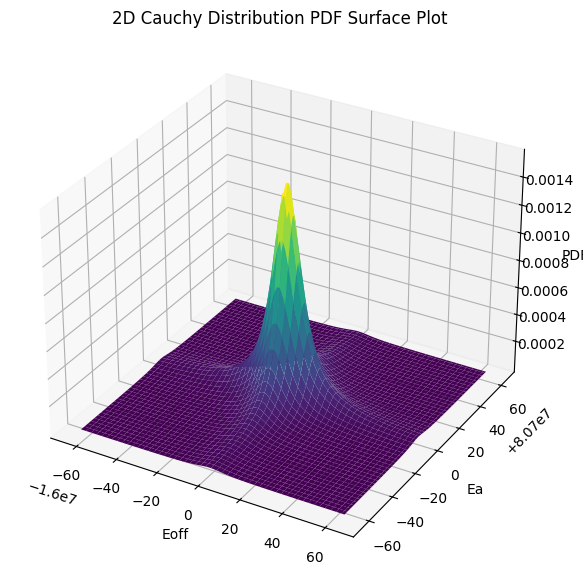

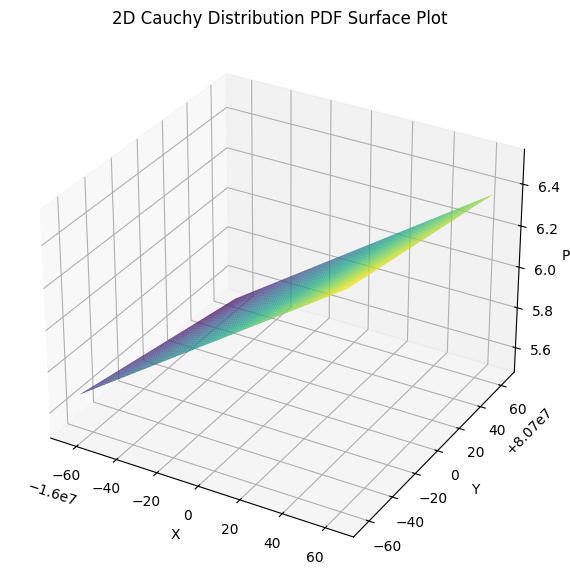

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import cauchy

E_off0=-1.6e+7
Ea0=8.07e+7
range=63.7

# 2차원 격자의 x와 y 범위 설정
x = np.linspace(-range, range, 100)  # x 범위
y = np.linspace(-range, range, 100)  # y 범위
x=x+E_off0
y=y+Ea0

print(y)

X, Y = np.meshgrid(x, y)

# 위치 및 척도 설정
location = 0     # 중심 위치
scale =8      # 스케일(너비)

# 2D Cauchy 분포의 PDF를 계산
pdf_array = cauchy.pdf(X, loc=E_off0, scale=scale) * cauchy.pdf(Y, loc=Ea0, scale=scale)

# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_array, cmap='viridis')

ax.set_xlabel('Eoff')
ax.set_ylabel('Ea')
ax.set_zlabel('PDF', rotation=0)
plt.title("2D Cauchy Distribution PDF Surface Plot")
plt.show()

# 위치 및 척도 설정
location = 0   # 중심 위치
scale = 3        # 스케일(너비)

# 2D Cauchy 분포의 PDF를 계산
pdf_array = cauchy.pdf(X, loc=location, scale=scale) * cauchy.pdf(Y, loc=location, scale=scale)

# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_array, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
plt.title("2D Cauchy Distribution PDF Surface Plot")
plt.show()




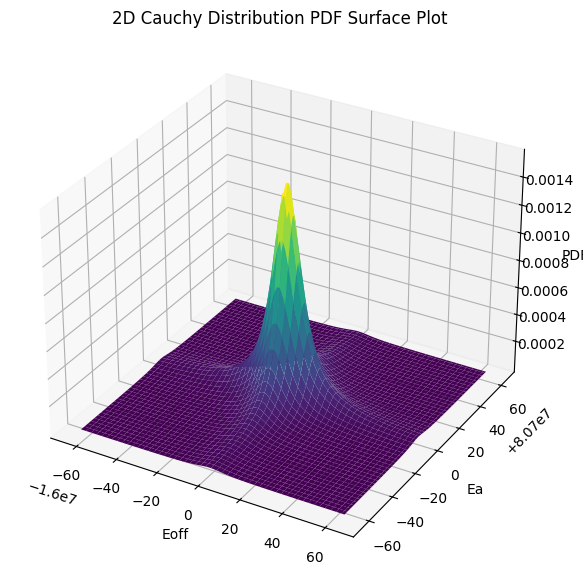

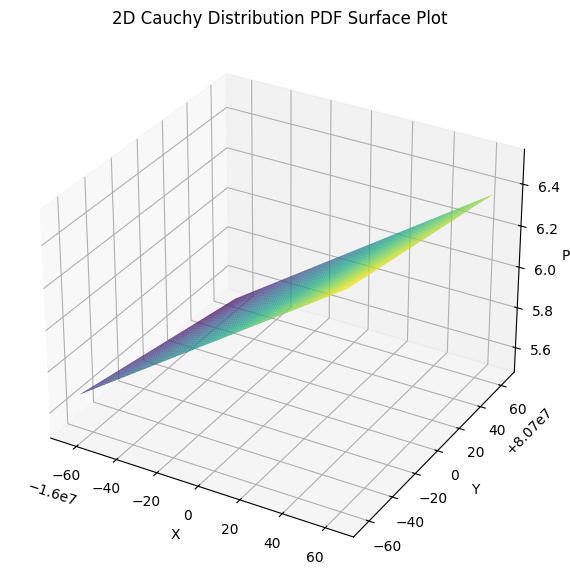

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import cauchy

E_off0=-1.6e+7
Ea0=8.07e+7
range=63.7

# 2차원 격자의 x와 y 범위 설정
x = np.linspace(-range, range, 100)  # x 범위
y = np.linspace(-range, range, 100)  # y 범위
x=x+E_off0
y=y+Ea0


X, Y = np.meshgrid(x, y)

# 위치 및 척도 설정
location = 0     # 중심 위치
scale =8      # 스케일(너비)

# 2D Cauchy 분포의 PDF를 계산
pdf_array = cauchy.pdf(X, loc=E_off0, scale=scale) * cauchy.pdf(Y, loc=Ea0, scale=scale)

# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_array, cmap='viridis')

ax.set_xlabel('Eoff')
ax.set_ylabel('Ea')
ax.set_zlabel('PDF', rotation=0)
plt.title("2D Cauchy Distribution PDF Surface Plot")
plt.show()

# 위치 및 척도 설정
location = 0   # 중심 위치
scale = 3        # 스케일(너비)

# 2D Cauchy 분포의 PDF를 계산
pdf_array = cauchy.pdf(X, loc=location, scale=scale) * cauchy.pdf(Y, loc=location, scale=scale)

# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_array, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
plt.title("2D Cauchy Distribution PDF Surface Plot")
plt.show()


